<a href="https://colab.research.google.com/github/till2/me/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the model
model = load_model(filepath, compile = True)

In [48]:
# Save the model
filepath = './saved_model'
save_model(model, filepath)

INFO:tensorflow:Assets written to: ./saved_model/assets


In [47]:
!pip install keras
!pip install numpy
!pip install matplotlib

import tensorflow as tf
import datetime
import numpy as np
import tensorflow
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import save_model, load_model
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from matplotlib import pyplot as plt

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
y_train[:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

In [4]:
print(
    X_train.shape,
    y_train.shape,
    X_valid.shape,
    y_valid.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


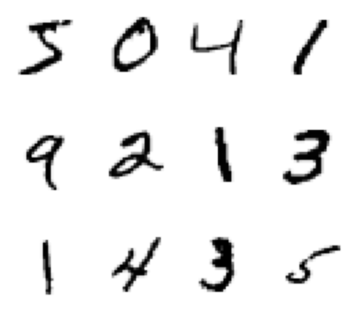

In [5]:
plt.figure(figsize=(5, 5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_train[i], cmap='Greys')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [6]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

X_train /= 255
X_valid /= 255

In [7]:
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_valid = np_utils.to_categorical(y_valid, n_classes)

In [8]:
model = Sequential()

In [9]:
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
#kernel_initializer="normal"

In [10]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [11]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [13]:
model.fit(X_train, y_train, batch_size=128, epochs=1000, verbose=1)

Epoch 1/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.1876 - accuracy: 0.9449
Epoch 2/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.1778 - accuracy: 0.9481
Epoch 3/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.1681 - accuracy: 0.9509
Epoch 4/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.1604 - accuracy: 0.9535
Epoch 5/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.1537 - accuracy: 0.9551
Epoch 6/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.1473 - accuracy: 0.9570
Epoch 7/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.1415 - accuracy: 0.9583
Epoch 8/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.1358 - accuracy: 0.9597
Epoch 9/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.1308 - accuracy: 0.9617
Epoch 10/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.126

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 69,226
Trainable params: 69,226
Non-trainable params: 0
_________________________________________________________________


In [16]:
scores = model.evaluate(X_valid, y_valid, verbose=0)
print("Evaluation: %.2f%%" % (scores[1]*100))

Evaluation: 97.33%


In [97]:
Final_Boss = [[0,0,1,1,1,0,0],
              [0,1,0,0,1,1,0],
              [0,0,0,0,0,1,0],
              [0,0,0,1,1,0,0],
              [0,0,0,0,0,1,0],
              [0,0,1,0,1,1,0],
              [0,0,0,1,1,0,0]]

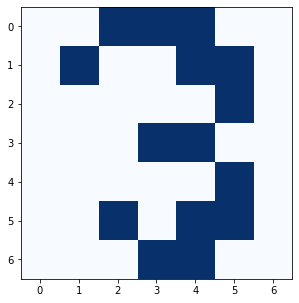

In [98]:
plt.figure(figsize=(5, 5))
plt.imshow(Final_Boss, cmap='Blues')
# plt.axis("off")
plt.show()

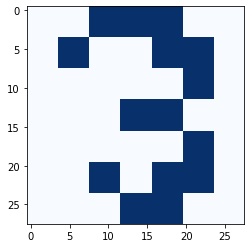

In [99]:
# PLEAAASE = np.reshape(Final_Boss, (28, 28))
PLEAAASE = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in Final_Boss])
plt.imshow(PLEAAASE.reshape(28, 28), cmap='Blues')

In [100]:
# test with X_train[0] or PLEAAASE

to_predict = np.array([PLEAAASE])
to_predict.shape

(1, 784)

In [123]:
prediction = model.predict(to_predict)
print(prediction)

[[4.9840879e-38 1.5400411e-21 3.7673525e-14 9.9999988e-01 0.0000000e+00
  3.3917486e-19 1.4324588e-33 1.7849521e-37 1.0418765e-07 2.2066495e-26]]


In [124]:
# What is it???
np.argmax(prediction)

3

🥳 🎉🎉🎉🎉

In [131]:
LastTest_ = [[0,0,0,0,0,0,0],
             [0,0,1,0,1,0,0],
             [0,0,1,0,1,0,0],
             [0,0,1,1,1,1,0],
             [0,0,0,0,1,0,0],
             [0,0,0,0,1,0,0],
             [0,0,0,0,0,0,0]]

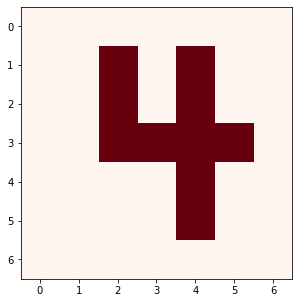

In [132]:
plt.figure(figsize=(5, 5))
plt.imshow(Last_Test, cmap='Reds')
plt.show()

In [133]:
Last_Test = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in LastTest_])
to_predict_2 = np.array([Last_Test])
prediction_2 = model.predict(to_predict_2)
print(prediction_2)
print(np.argmax(prediction_2))

[[2.8694267e-21 1.0422579e-30 4.1575080e-29 1.5058089e-19 1.0000000e+00
  1.1187402e-12 9.2818908e-23 1.3062637e-13 3.0271085e-13 1.6557442e-13]]
4
